In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('C:/Users/A30010587/Downloads/cwp_interview/cwp_interview/'))
if module_path not in sys.path:
    sys.path.append(module_path)


import torch
import numpy as np
from typing import Optional, Dict, Any
import torch
import torch.nn as nn
from utils import TimeseriesDataset, NormalizationIdentity, NormalizationStandardization, _split_series_time_dims, _merge_series_time_dims, _easy_mlp, device
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cvxpy as cp
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("Question2.csv", index_col=0, header=[0,1], parse_dates=True)

Data Import

In [2]:
da = data["da"]
rt = data["rt"]
X = data["X"]

# example of prices with a two day lag if you wish to use timeseries as features (ie RNN, CNN, ARIMA, etc...)
shifted_da = da.shift(freq="48H")
shifted_rt = rt.shift(freq="48H")

split = datetime(2020,8,1)

X_train = X.loc[:split]
X_validate = X.loc[split:]

da_train = da.loc[:split]
da_validate = da.loc[split:]

rt_train = rt.loc[:split]
rt_validate = rt.loc[split:]

print('\nVerify NaN values')
print('X_train',X_train.isnull().values.any())
print('Nan index in X_train',X_train.isnull().values.any(1).nonzero()[0])
X_train.fillna(X_train.median(), inplace = True)
print('X_train',X_train.isnull().values.any())
print('X_validate',X_validate.isnull().values.any())
print('da_train',da_train.isnull().values.any())
print('da_validate',da_validate.isnull().values.any())
print('rt_train',rt_train.isnull().values.any())
print('rt_validate',rt_validate.isnull().values.any())



Verify NaN values
X_train True
Nan index in X_train [10468]
X_train False
X_validate False
da_train False
da_validate False
rt_train False
rt_validate False


RNN decoder

In [3]:
from Model import TradingBot
from QuantileDecoder import QuantileDecoder, AttentionalQuantile
from utils import hourly_results, worst_loss
def RNN_model(gamma:float, l_norm:int):
    model_name = 'RNN_model'
    net = TradingBot(
        num_series=100,
        input_dim = 4,
        gamma = gamma,
        l_norm = l_norm,
        data_normalization="standardization",
        loss_normalization="series",
        rnn_decoder={
            "dim_hidden_features":2,
            "num_layers":2,#32,
            "dim_output":168 #predict one day ahead for the next week 24*7
        },
        # series_embedding_dim=2,
        # input_encoder_layers=3,
        # input_encoding_normalization=True,
    )
    return net.to(device), model_name

TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:19<00:00,  1.91s/it]


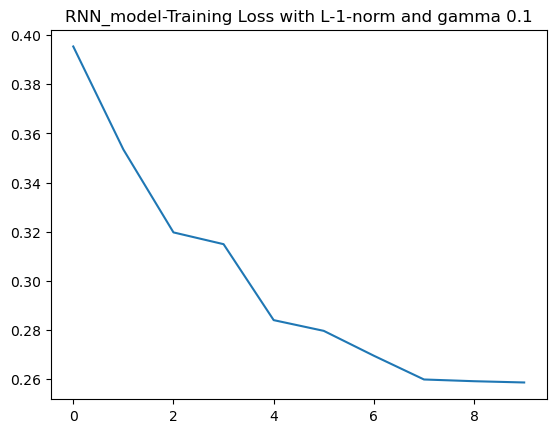

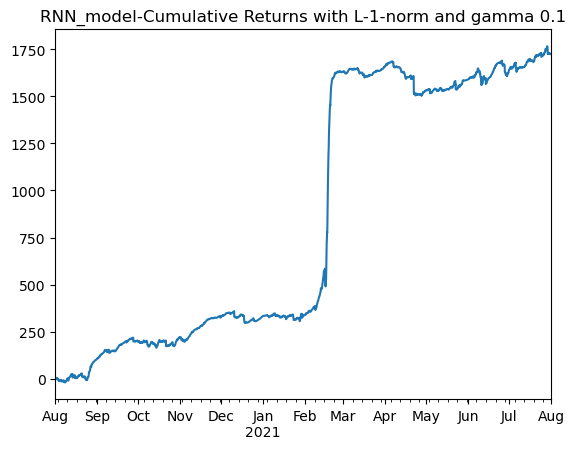

Portfolio returns 1387.0639999999999
constraint -60.414
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:19<00:00,  1.90s/it]


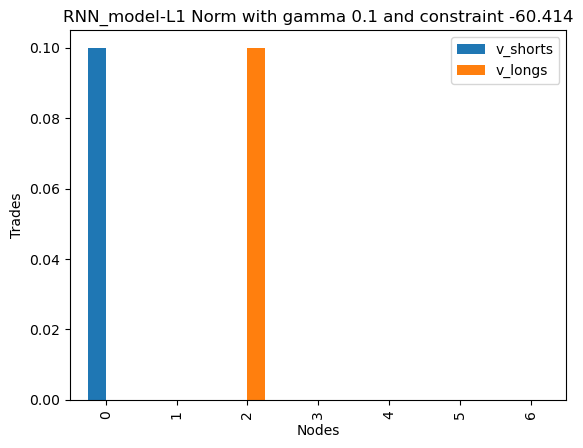

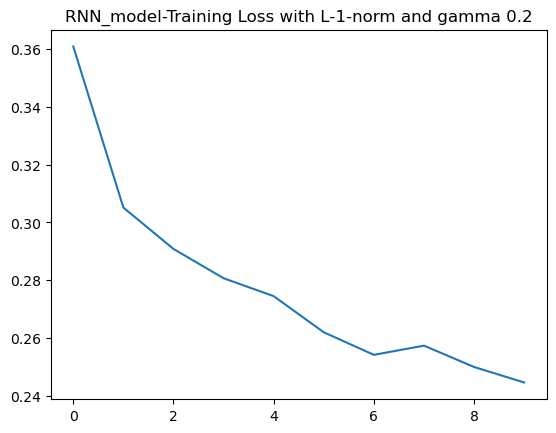

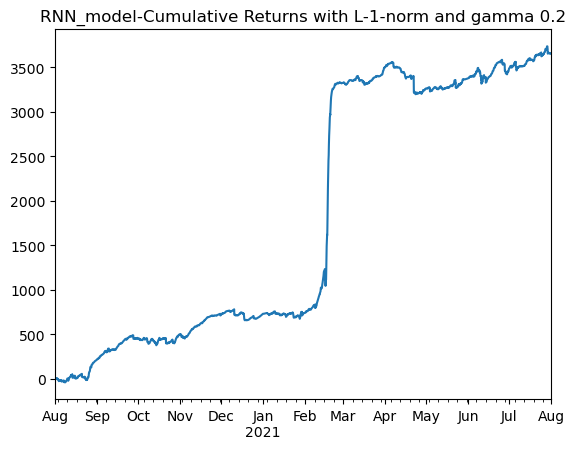

Portfolio returns 3004.364
constraint -120.828
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:19<00:00,  1.92s/it]


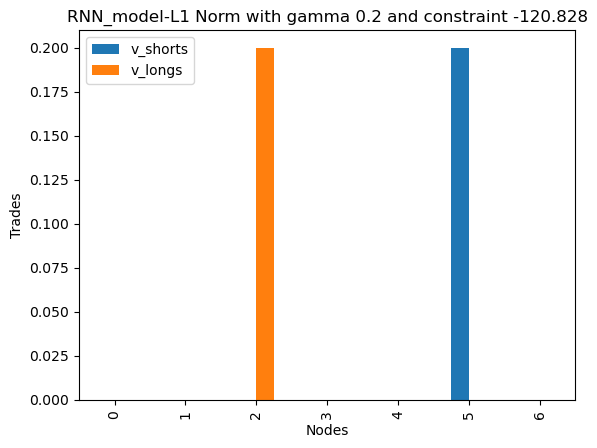

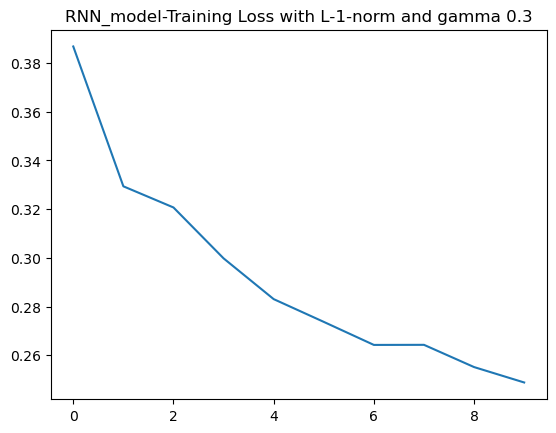

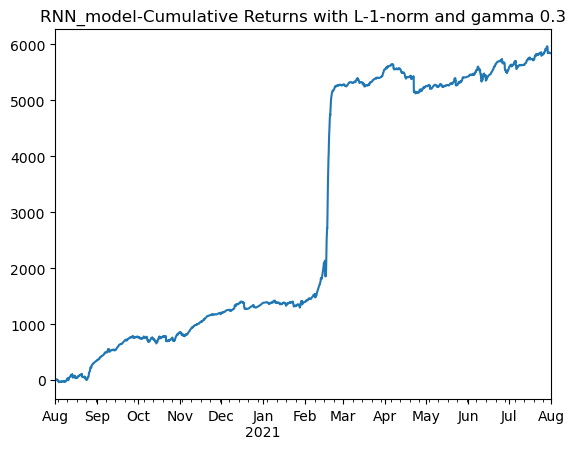

Portfolio returns 4660.368
constraint -181.242
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:18<00:00,  1.90s/it]


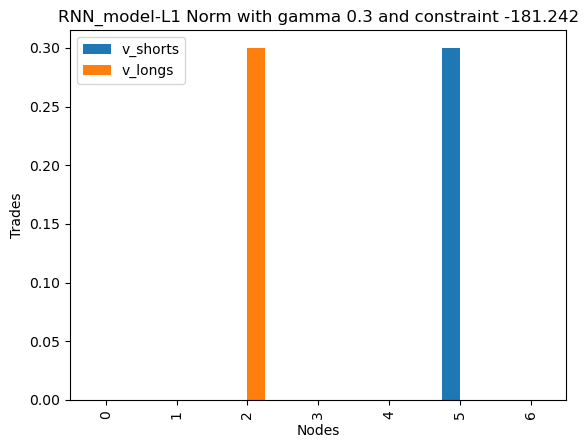

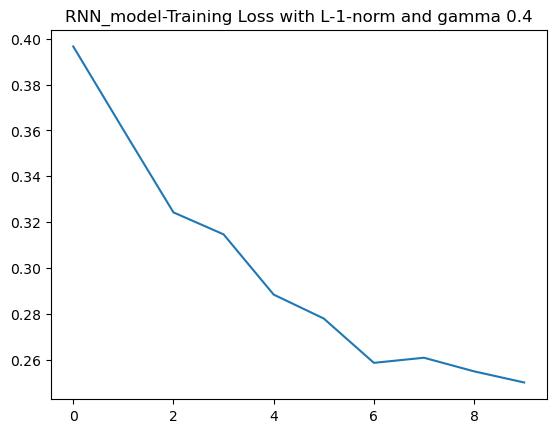

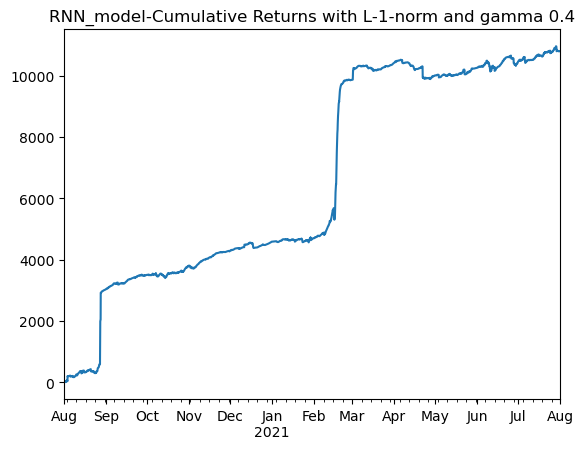

Portfolio returns 7752.336
constraint -241.656
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:19<00:00,  1.92s/it]


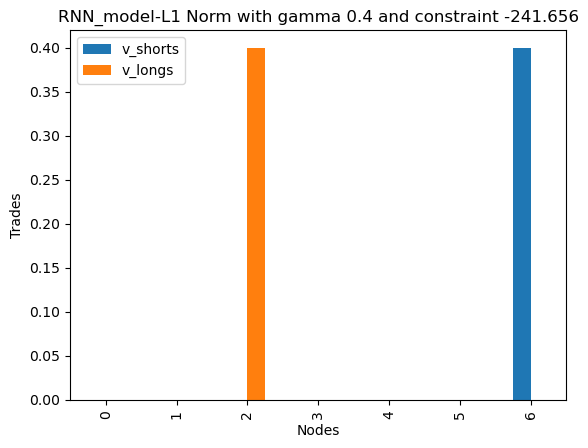

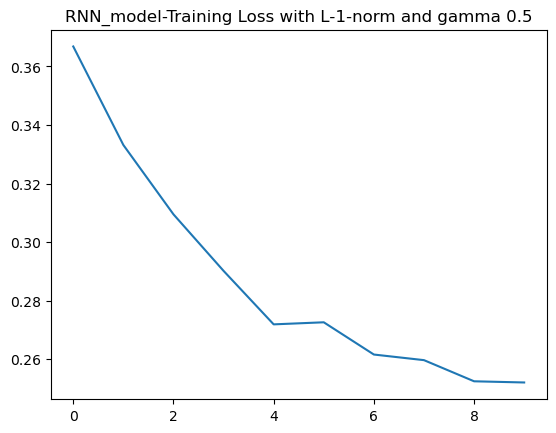

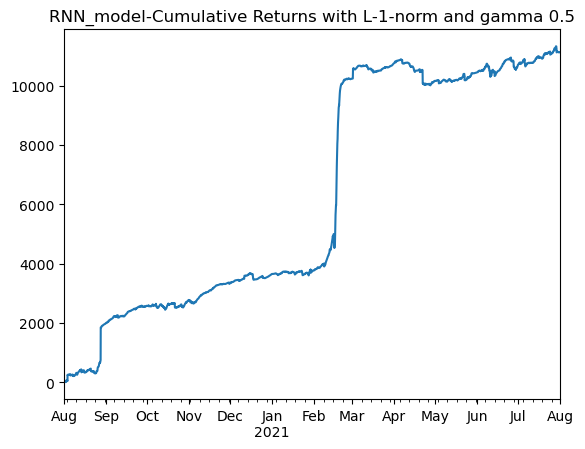

Portfolio returns 7619.349999999999
constraint -302.07
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


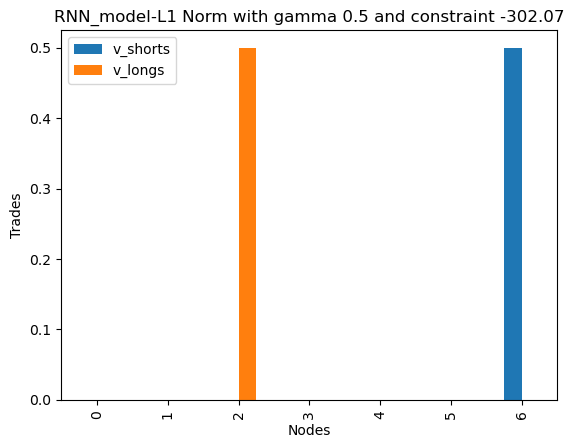

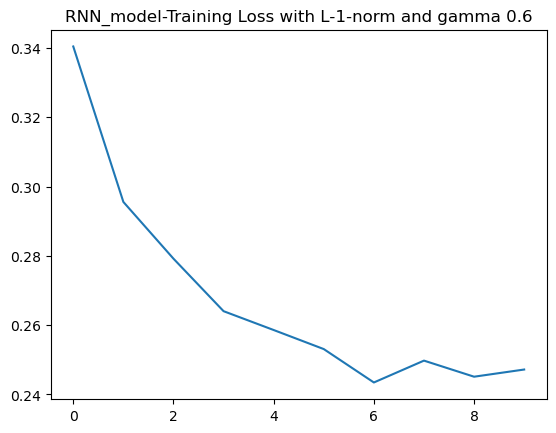

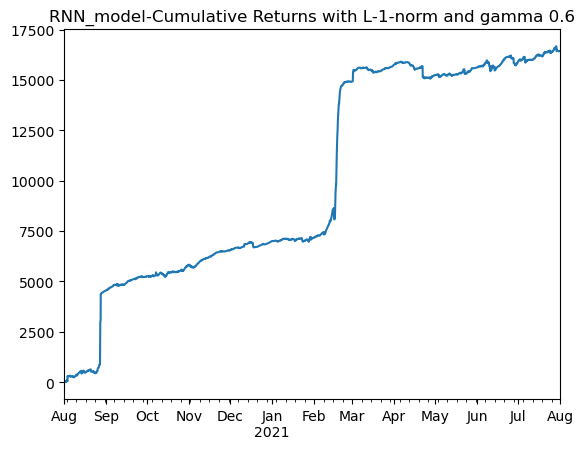

Portfolio returns 11688.126
constraint -362.484
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:19<00:00,  1.97s/it]


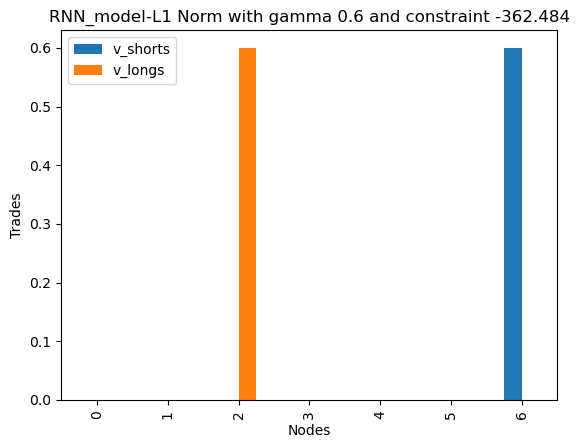

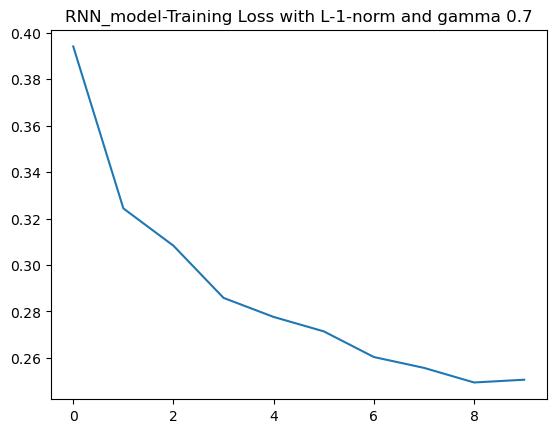

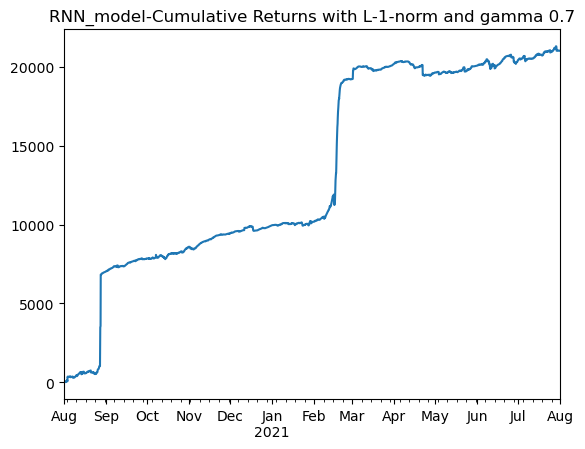

Portfolio returns 14952.489999999998
constraint -422.89799999999997
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:18<00:00,  1.88s/it]


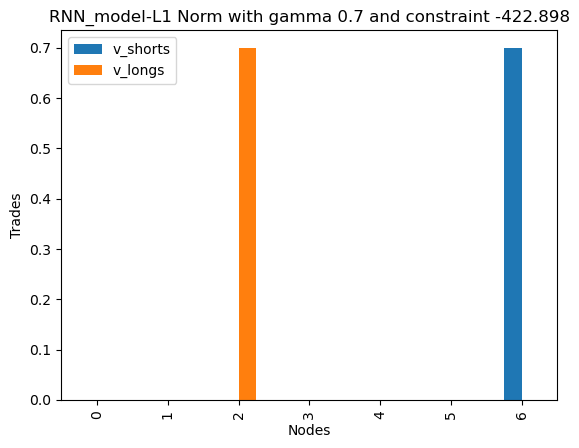

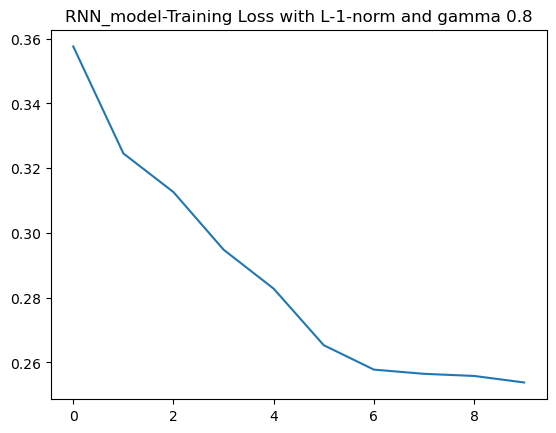

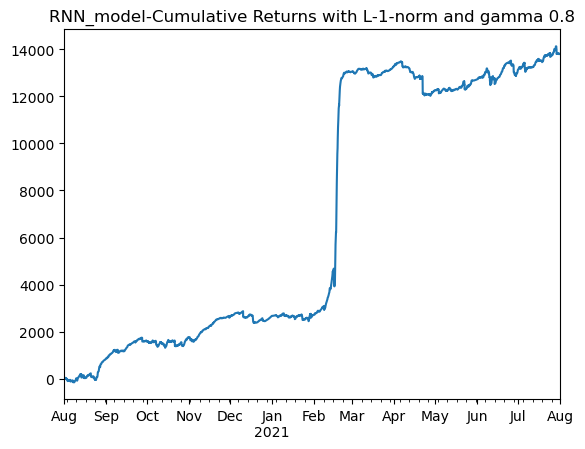

Portfolio returns 11395.808
constraint -483.312
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:19<00:00,  1.90s/it]


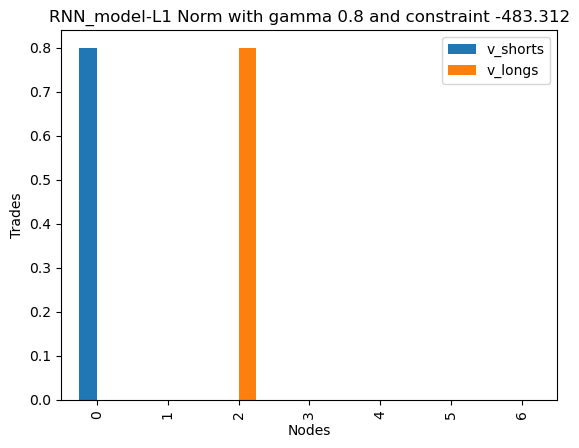

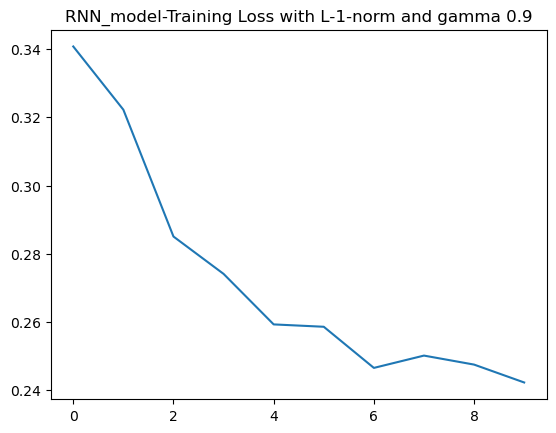

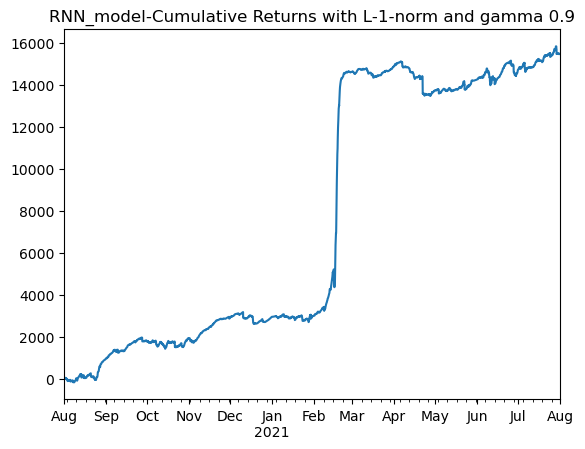

Portfolio returns 10719.927000000001
constraint -543.726
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:18<00:00,  1.90s/it]


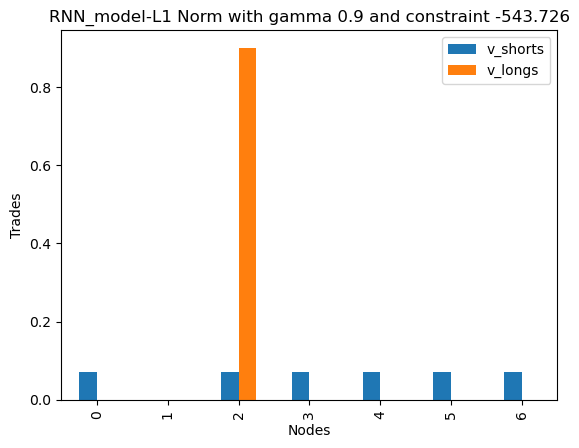

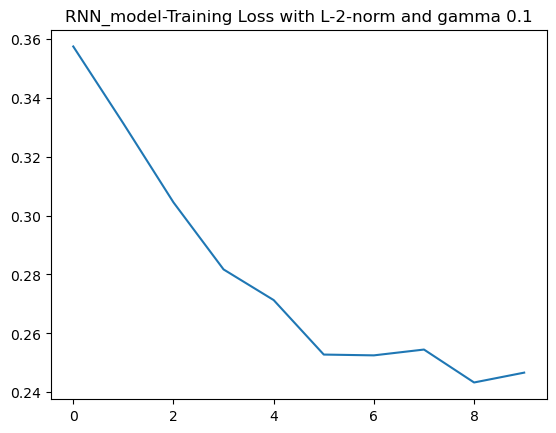

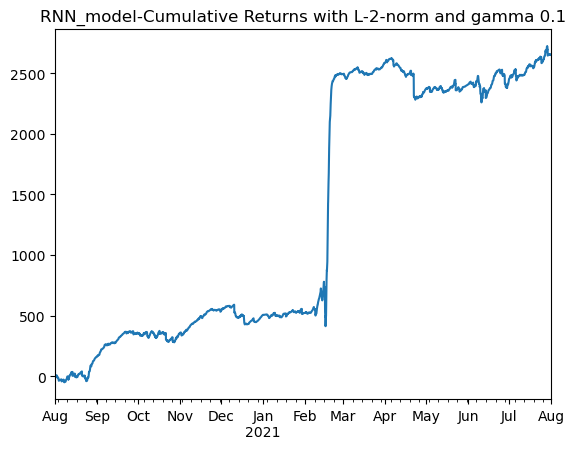

Portfolio returns 2271.97102
constraint -121.354776
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:19<00:00,  1.91s/it]


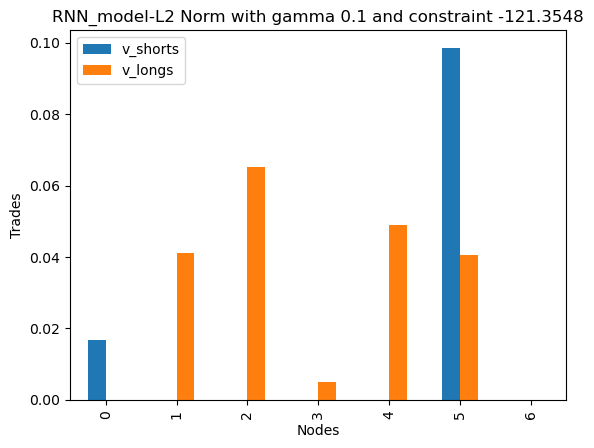

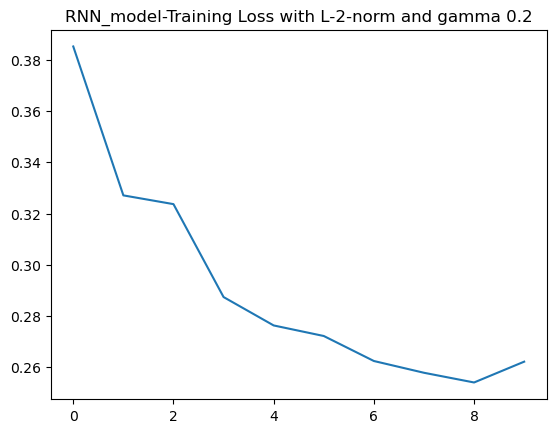

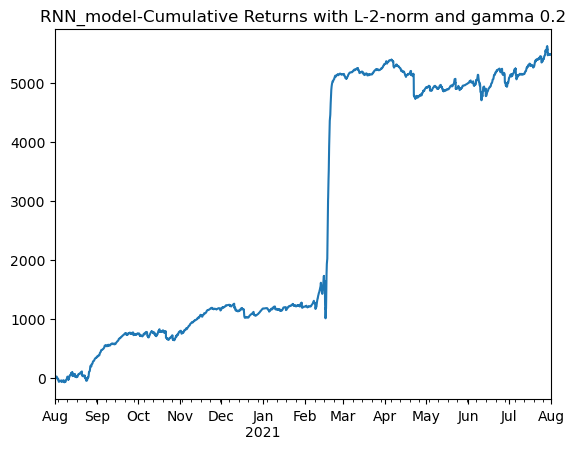

Portfolio returns 4589.211535
constraint -241.24731100000002
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:18<00:00,  1.89s/it]


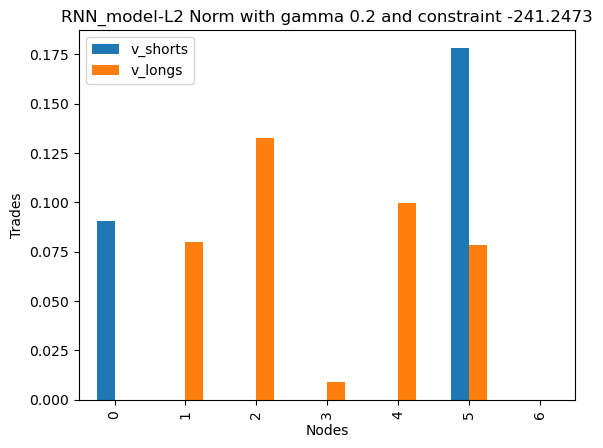

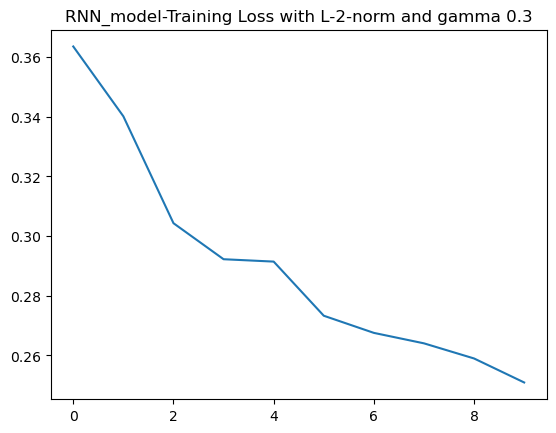

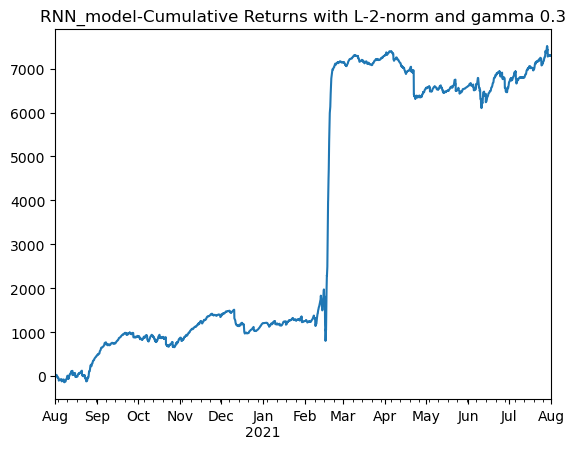

Portfolio returns 6490.338441000002
constraint -361.896104
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:19<00:00,  1.96s/it]


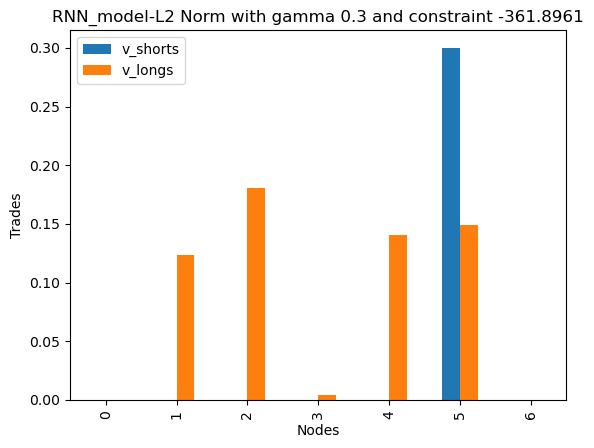

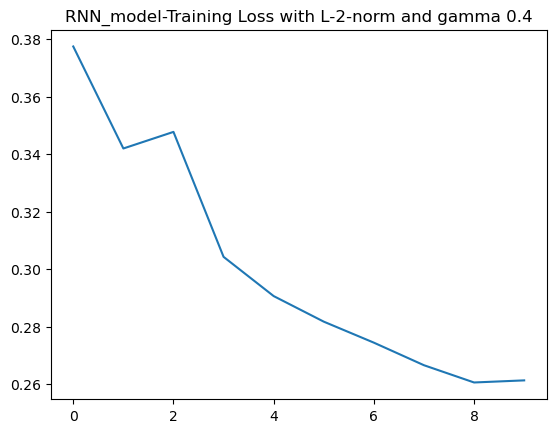

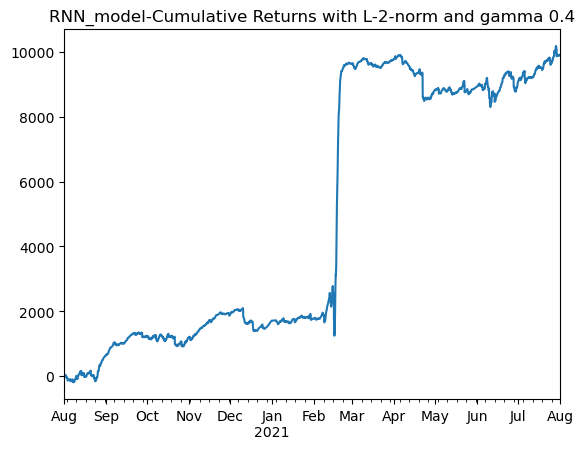

Portfolio returns 9131.030959
constraint -488.8578
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:21<00:00,  2.14s/it]


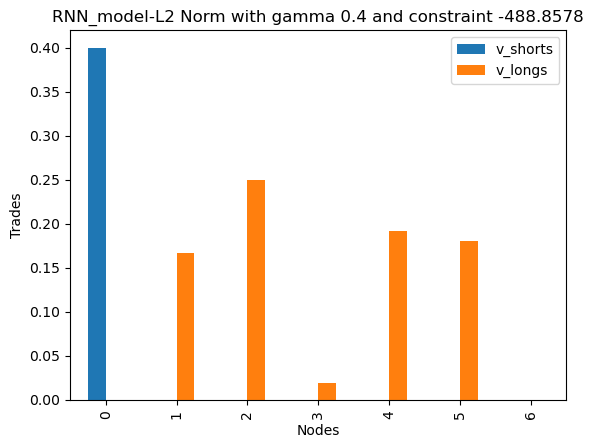

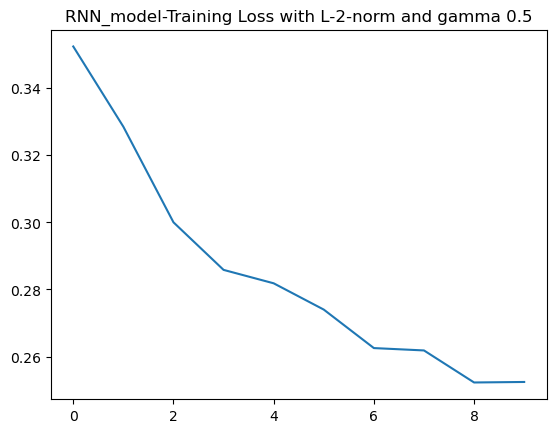

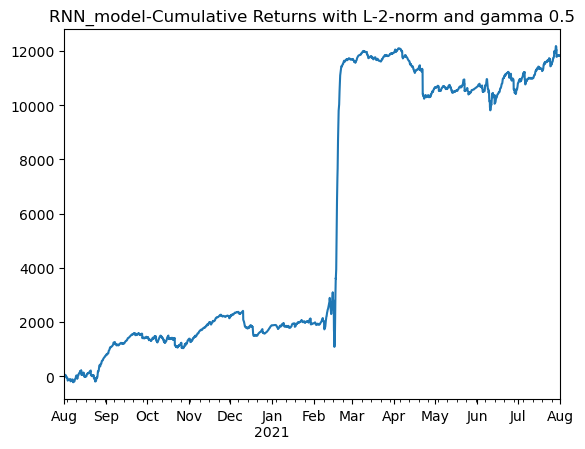

Portfolio returns 9878.772724
constraint -599.6120920000001
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:19<00:00,  1.93s/it]


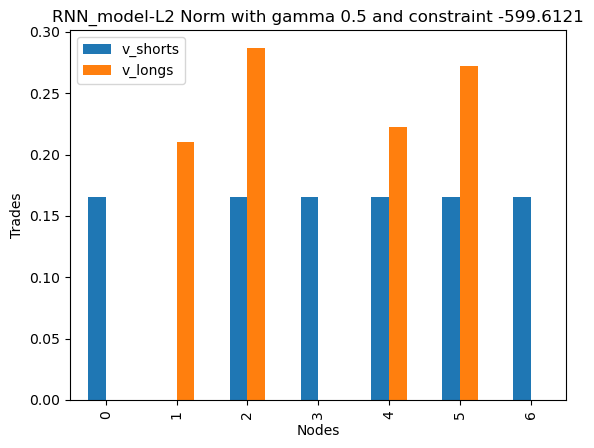

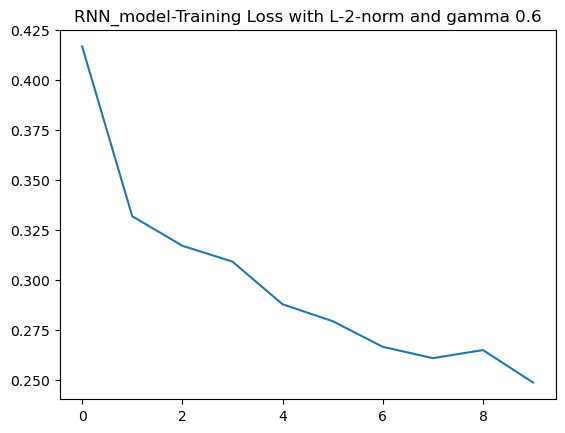

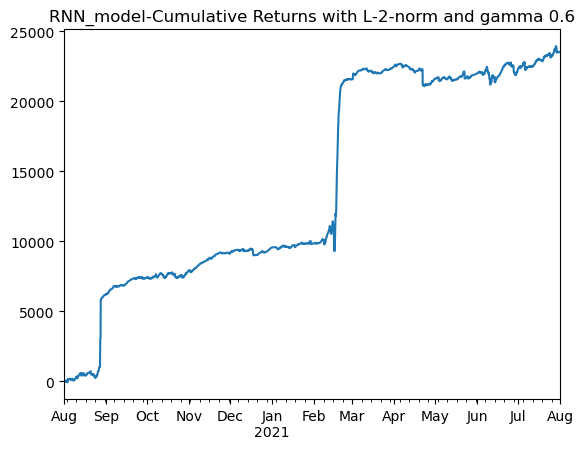

Portfolio returns 17518.383655
constraint -737.1997069999999
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:19<00:00,  1.92s/it]


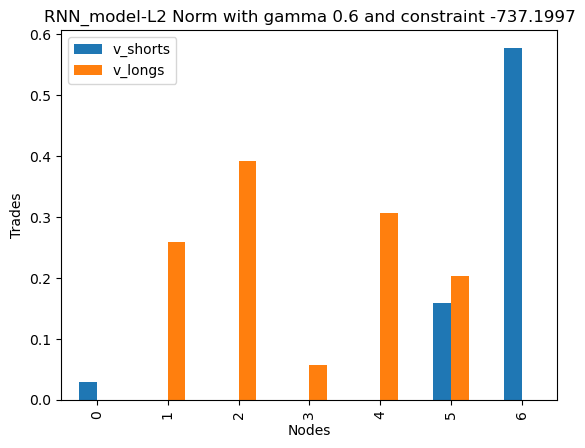

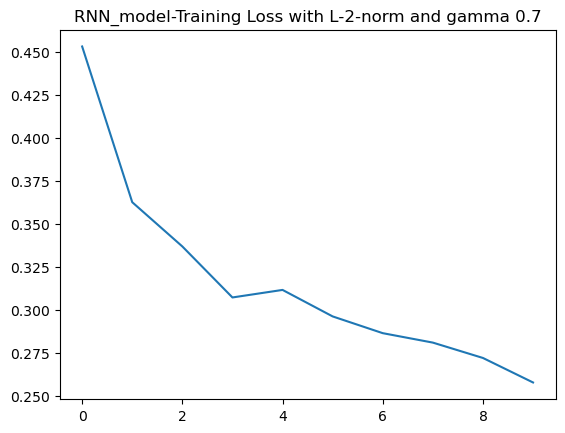

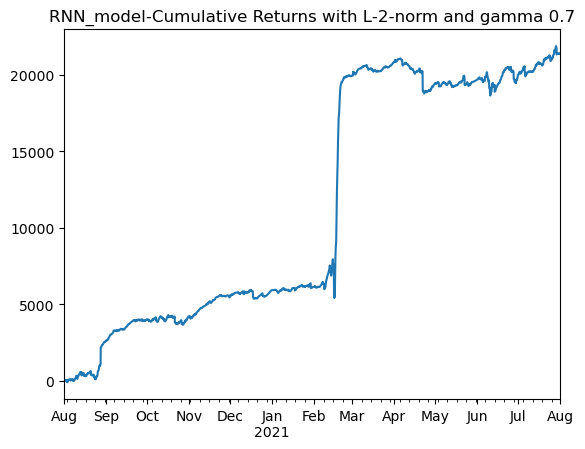

Portfolio returns 16387.30164
constraint -844.6539480000001
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:19<00:00,  1.92s/it]


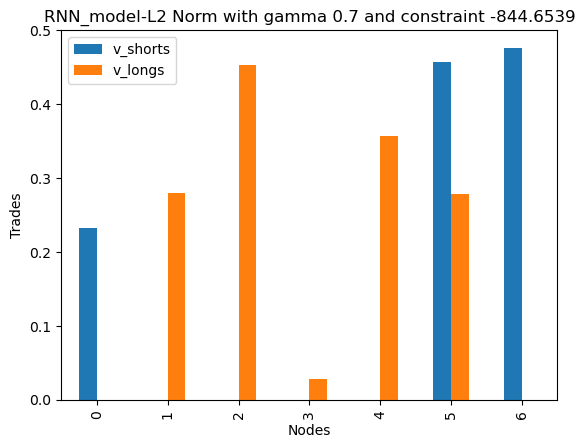

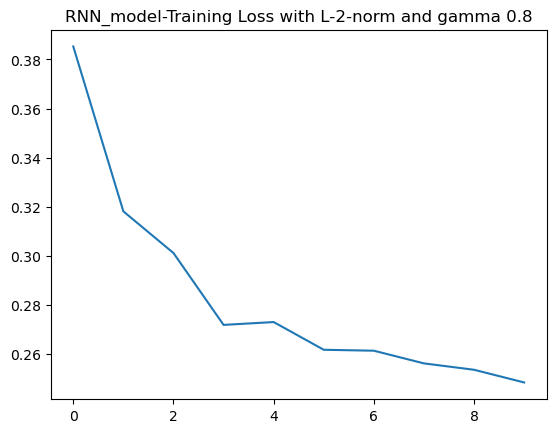

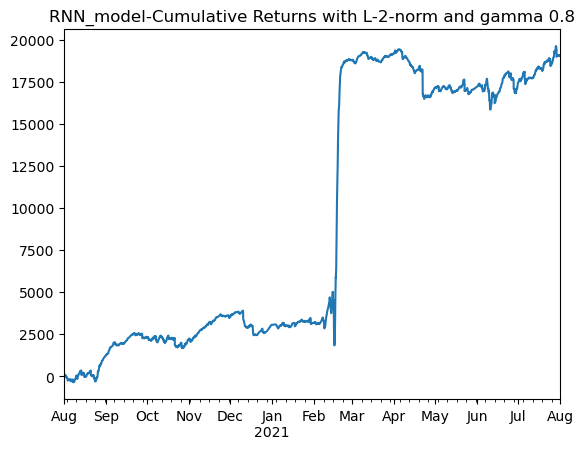

Portfolio returns 16333.719122999999
constraint -959.482295
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


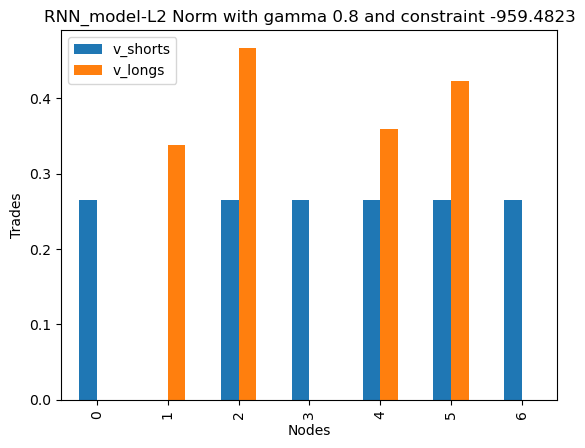

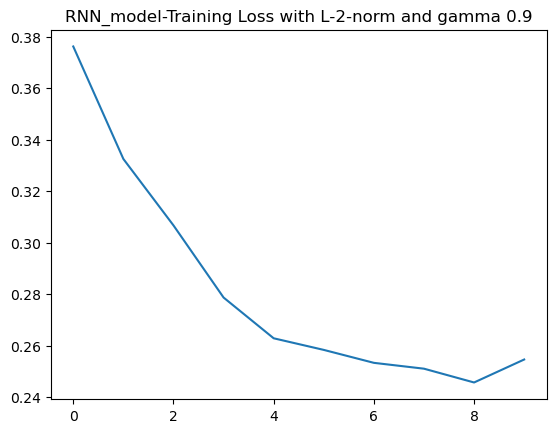

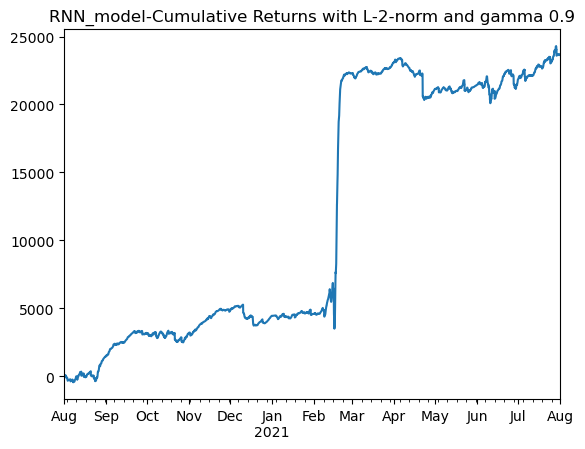

Portfolio returns 20700.940058
constraint -1099.093317


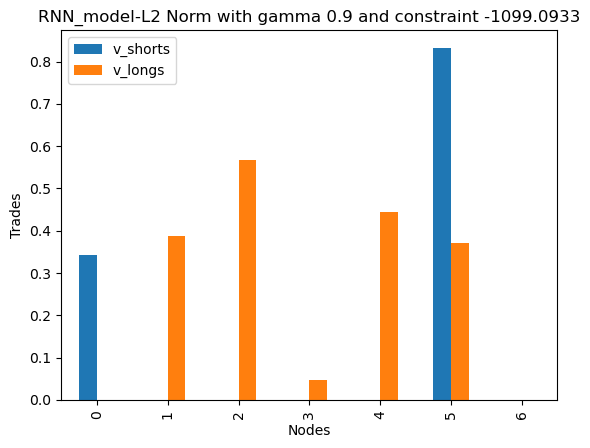

In [4]:

L_vals = np.arange(0.1,0.9,0.1)#[0.1, 0.5, 0.8]
L_norms = [1,2]
pd_dict={}
worst_loss_list = np.empty((len(L_norms), len(L_vals)))
total_return_list = []
for l_norm in L_norms:
    for k, L_val in enumerate(L_vals):
        nodes = 7
        volume_short = np.zeros((len(L_vals), nodes))
        volume_long = np.zeros((len(L_vals), nodes))
        net, model_name = RNN_model(gamma= L_val, l_norm=l_norm)
        optimizer = torch.optim.RMSprop(net.parameters(), lr=1e-3, weight_decay=0)

        print(net)

        avg_loss = []

        NUM_EPOCHS = 10  # The model is very slow to train
        NUM_BATCHES = 35

        for epoch in tqdm(range(NUM_EPOCHS)):
            running_sum = 0
            for batch in range(NUM_BATCHES):
                running_sum += net.train_step(optimizer, 32, da_train.values.T, 24, 24)
            avg_loss.append(running_sum / NUM_BATCHES)

        plt.figure()
        plt.plot(avg_loss)
        plt.title('{}-Training Loss with L-{}-norm and gamma {}'.format(model_name,l_norm, round(L_val,4)))
        plt.show()

        v_long, bid, v_short, offer = net.predict(X_validate, da, da_validate, rt_validate)
        results = hourly_results(v_long, bid.values, v_short, offer.values, da_validate, rt_validate)
        pnl = results.sum(axis=1).cumsum()
        pnl.plot()
        plt.title('{}-Cumulative Returns with L-{}-norm and gamma {}'.format(model_name,l_norm, round(L_val,4)))
        plt.show()
        portfolio_rets = bid.dot(v_long)+ offer.dot(v_short)
        constraint = worst_loss(results)
        print('Portfolio returns',np.sum(portfolio_rets))
        print('constraint',constraint)
        portfolio_rets = bid.dot(v_long)+ offer.dot(v_short)
        for i in range(nodes):
            volume_long[k, :] = v_long
            volume_short[k, :] = v_short
            pd_dict[l_norm, k] = pd.DataFrame({"gamma": f"{round(L_vals[k],4)}",
                            "v_shorts":v_long,
                            "v_longs":v_short})
            pd_dict[l_norm,k]['L_norm'] = f"L{l_norm}"
            #cum_return = np.sum(portfolio_rets)[0]
            #print('cum_return', cum_return)
        pd_dict[l_norm,k]['model'] = model_name
        pd_dict[l_norm,k]['PTF_Return'] = np.sum(portfolio_rets)
        pd_dict[l_norm,k]['Worst_Return'] = constraint
        pd_dict[l_norm,k].loc[:, :'L_norm'].plot(kind="bar")
        plt.title("{}-L{} Norm with gamma {} and constraint {}".format(model_name,l_norm,pd_dict[l_norm,k]['gamma'][0], round(pd_dict[l_norm,k]['Worst_Return'][0],4)) )
        plt.xlabel("Nodes")
        plt.ylabel("Trades")
        #worst_loss_list[l_norm, k] = constraint
        #total_return_list[l_norm, k] = cum_return

In [5]:
pd_dict

{(1,
  0):   gamma  v_shorts  v_longs L_norm      model  PTF_Return  Worst_Return
 0   0.1       0.1      0.0     L1  RNN_model    1387.064       -60.414
 1   0.1       0.0      0.0     L1  RNN_model    1387.064       -60.414
 2   0.1       0.0      0.1     L1  RNN_model    1387.064       -60.414
 3   0.1       0.0      0.0     L1  RNN_model    1387.064       -60.414
 4   0.1       0.0      0.0     L1  RNN_model    1387.064       -60.414
 5   0.1       0.0      0.0     L1  RNN_model    1387.064       -60.414
 6   0.1       0.0      0.0     L1  RNN_model    1387.064       -60.414,
 (1,
  1):   gamma  v_shorts  v_longs L_norm      model  PTF_Return  Worst_Return
 0   0.2       0.0      0.0     L1  RNN_model    3004.364      -120.828
 1   0.2       0.0      0.0     L1  RNN_model    3004.364      -120.828
 2   0.2       0.0      0.2     L1  RNN_model    3004.364      -120.828
 3   0.2       0.0      0.0     L1  RNN_model    3004.364      -120.828
 4   0.2       0.0      0.0     L1  RNN_mod

Transformer Model

In [7]:
from Model import TradingBot
from utils import hourly_results, worst_loss
def Transformers_model(gamma:float, l_norm:int):
    model_name = 'Transformers'
    net = TradingBot(
        num_series=100,
        input_dim = 12,
        gamma = gamma,
        l_norm = l_norm,
        data_normalization="standardization",
        loss_normalization="series",
        series_embedding_dim=13,
        input_encoder_layers=3,
        input_encoding_normalization=True,
        encoder= {
            "attention_layers":3,
            "attention_heads": 3,
            "attention_dim": 4,
            "attention_feedforward_dim": 12,
        },
        quantile_decoder={
             "min_u": 0.01,
             "max_u": 0.99,
            "attentional_quantile": {
                "attention_heads": 3,
                "attention_layers": 3,
                "attention_dim": 12,
                "mlp_layers": 3,
                "mlp_dim": 16,
                "resolution": 50,
            },
        }
    )
    return net.to(device), model_name

TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_features=36, bias=True)
      (key_creators): ModuleLi

100%|██████████| 10/10 [02:49<00:00, 16.92s/it]


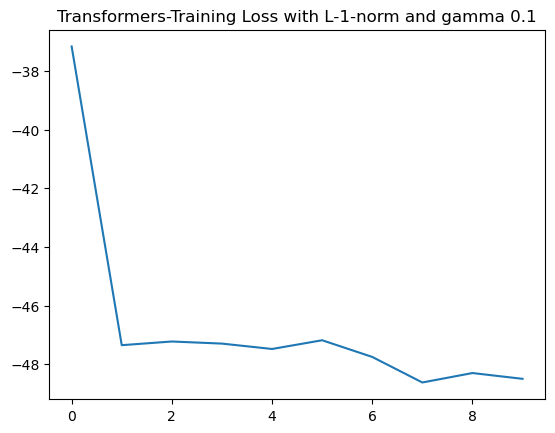

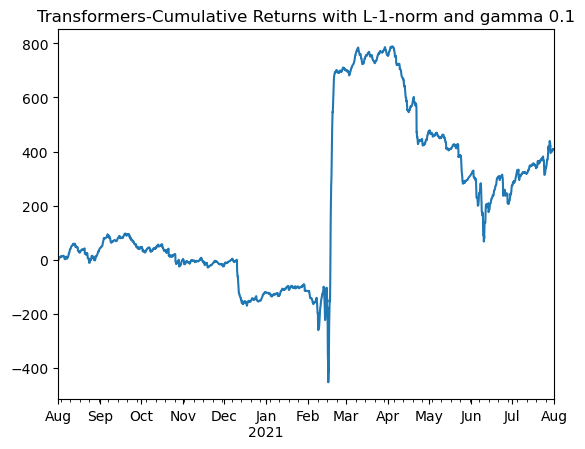

Portfolio returns 1048.861
constraint -61.09
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_features=

100%|██████████| 10/10 [02:57<00:00, 17.74s/it]


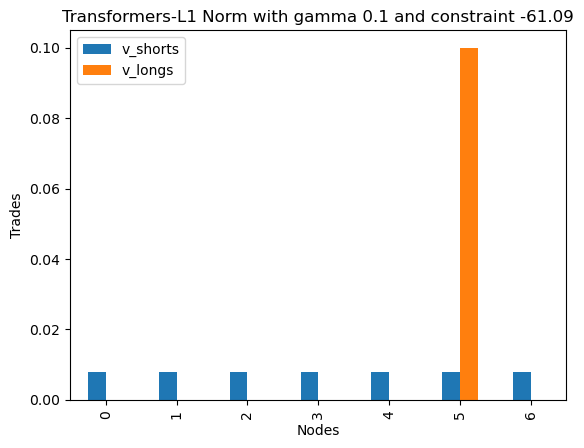

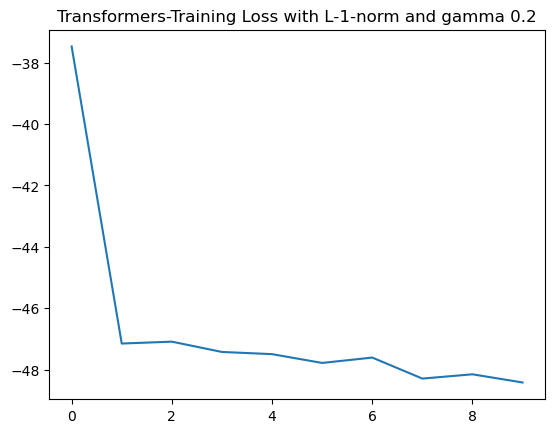

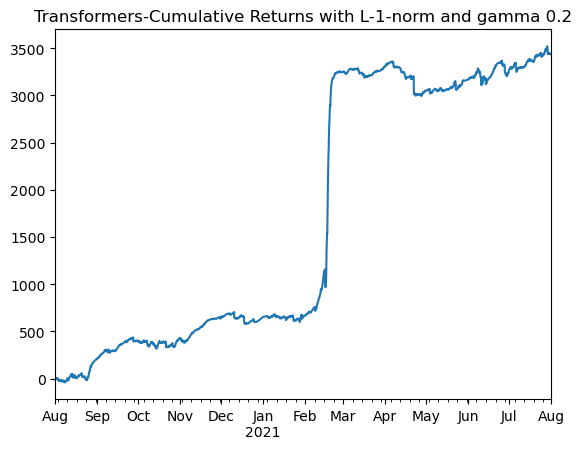

Portfolio returns 2243.94
constraint -120.828
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_features

100%|██████████| 10/10 [03:01<00:00, 18.17s/it]


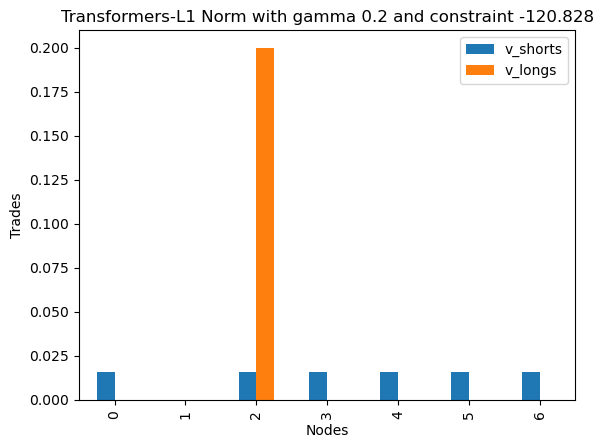

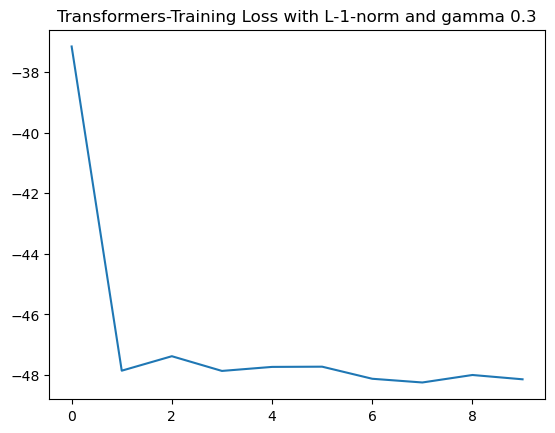

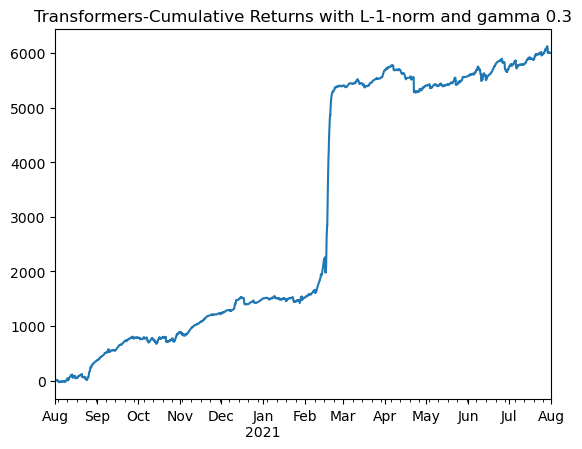

Portfolio returns 4640.913
constraint -181.242
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_feature

100%|██████████| 10/10 [02:55<00:00, 17.59s/it]


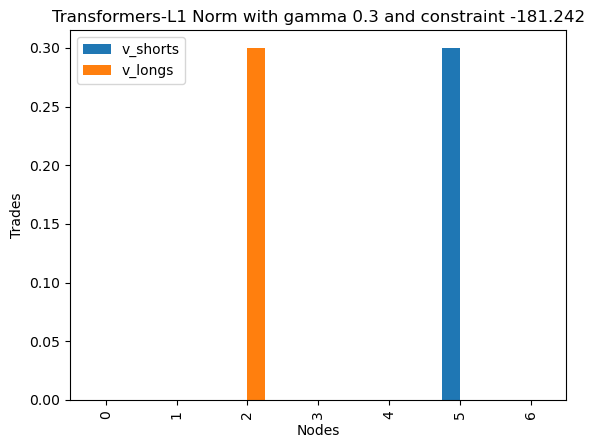

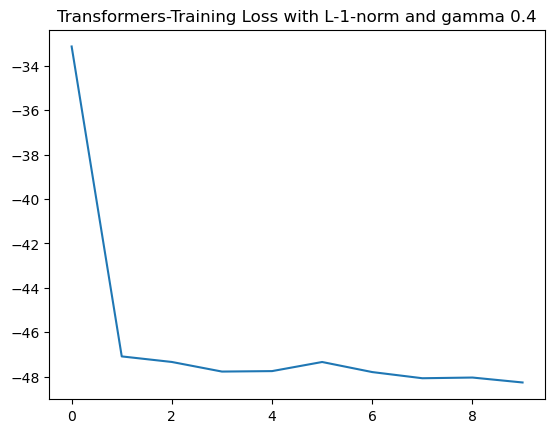

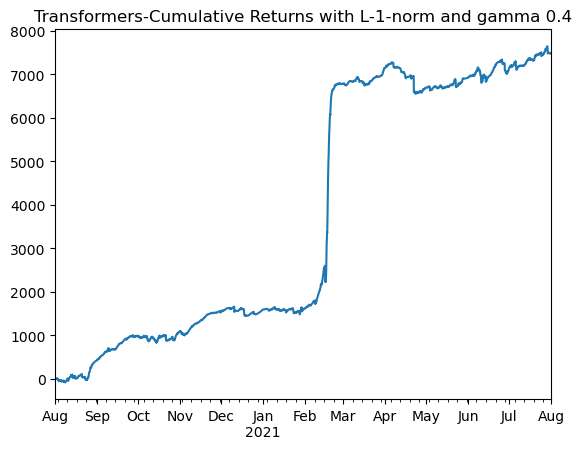

Portfolio returns 6009.208000000001
constraint -241.656
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, ou

100%|██████████| 10/10 [02:57<00:00, 17.78s/it]


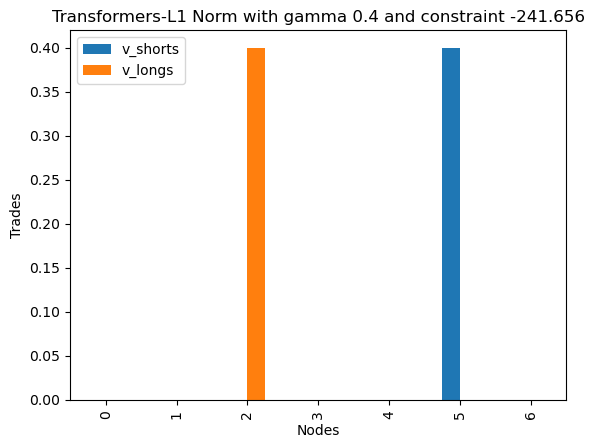

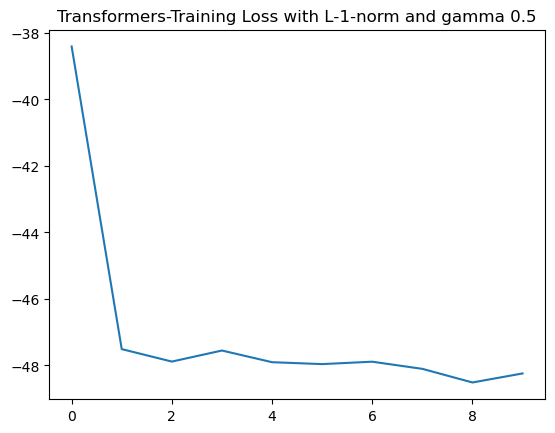

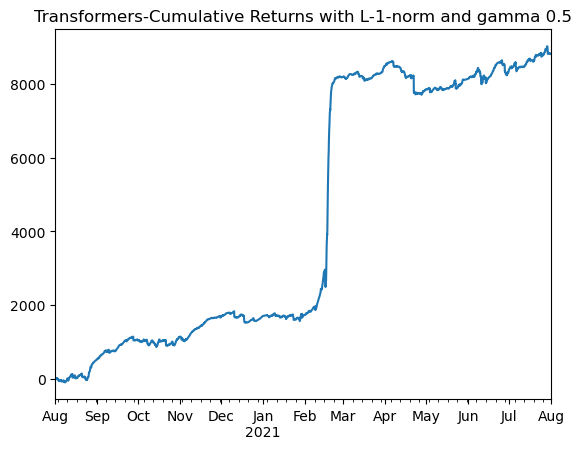

Portfolio returns 6891.459999999999
constraint -302.07
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out

100%|██████████| 10/10 [02:55<00:00, 17.58s/it]


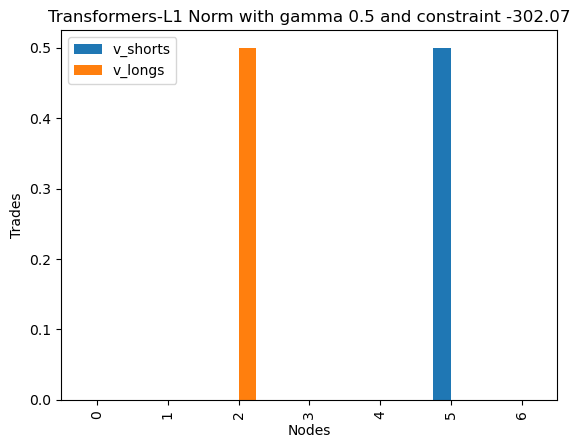

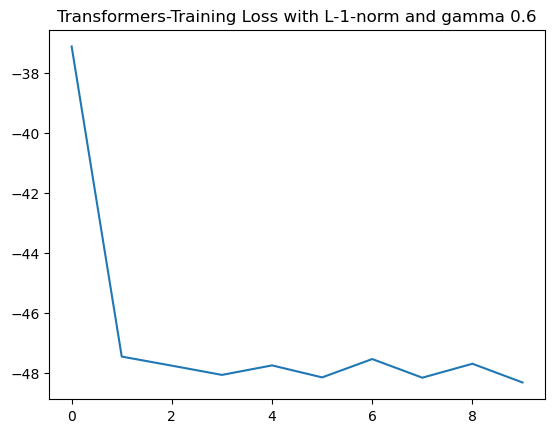

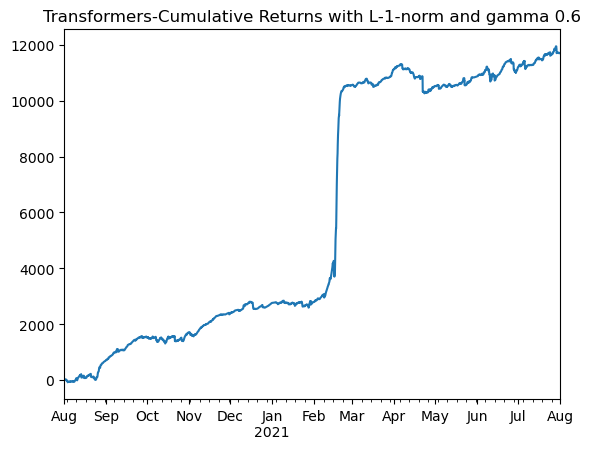

Portfolio returns 9303.671999999999
constraint -362.484
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, ou

100%|██████████| 10/10 [02:59<00:00, 17.90s/it]


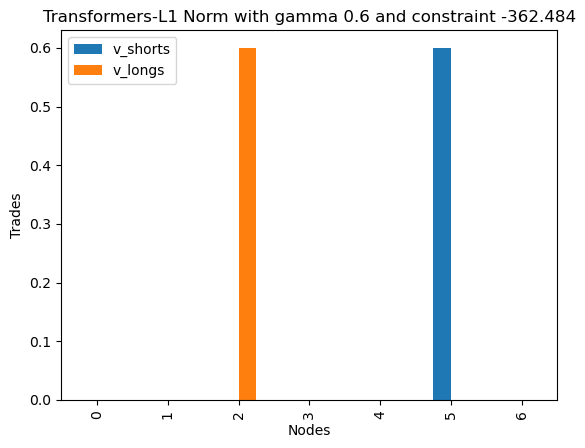

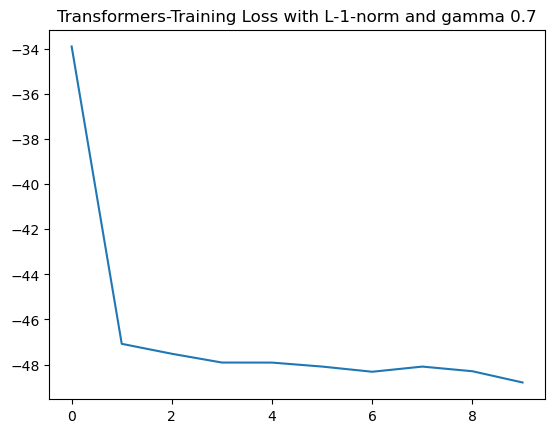

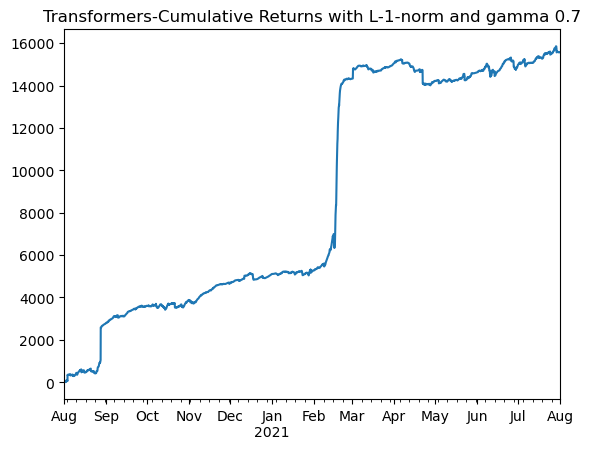

Portfolio returns 10686.766999999998
constraint -422.89799999999997
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_fea

100%|██████████| 10/10 [03:04<00:00, 18.45s/it]


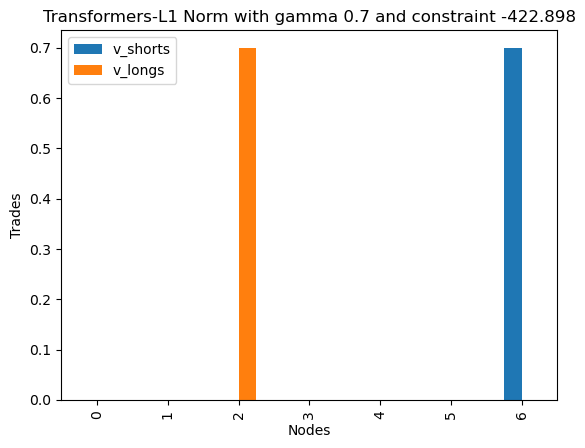

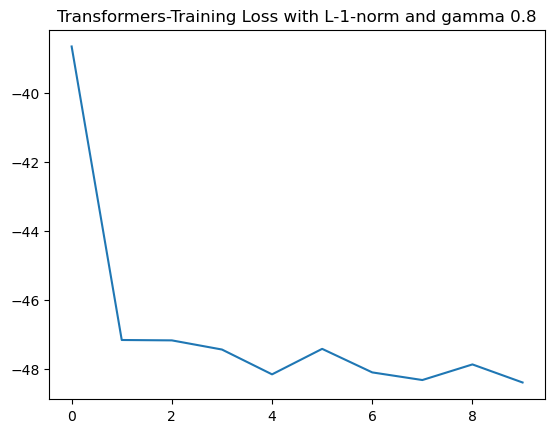

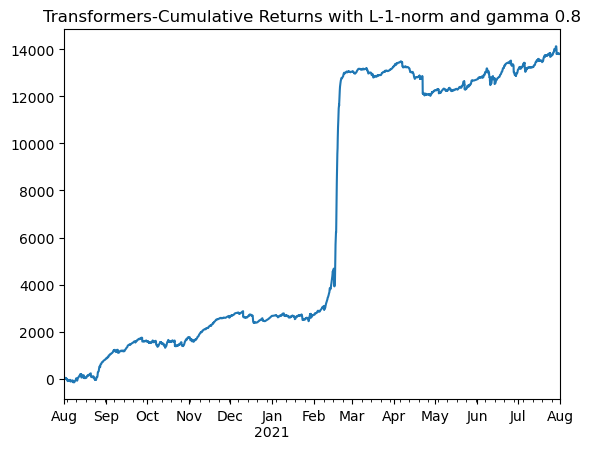

Portfolio returns 11396.264
constraint -483.312
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_featur

100%|██████████| 10/10 [03:07<00:00, 18.71s/it]


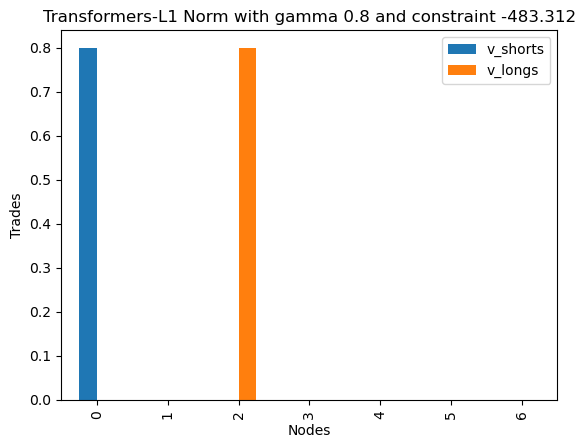

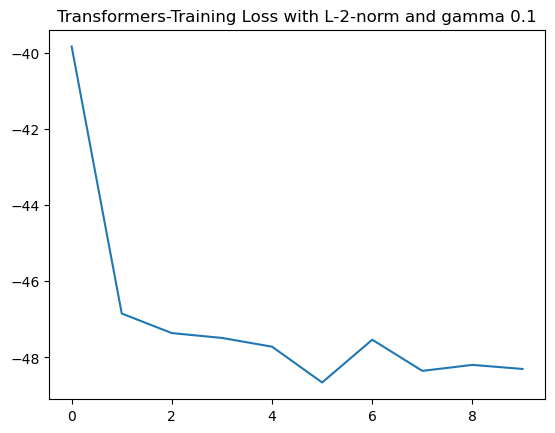

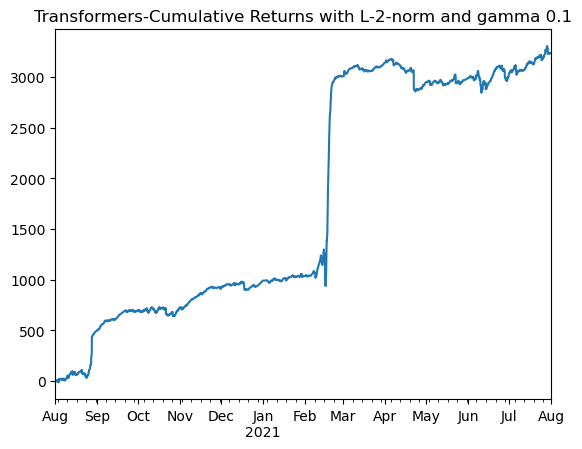

Portfolio returns 2441.6137779999995
constraint -120.927616
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12

100%|██████████| 10/10 [03:12<00:00, 19.22s/it]


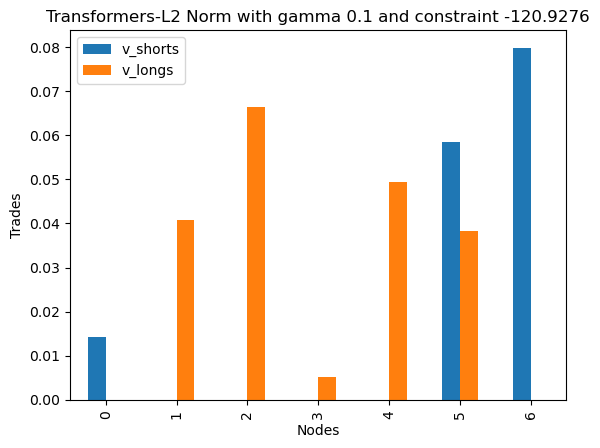

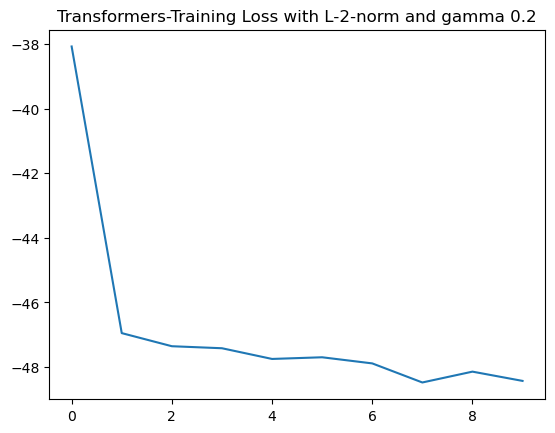

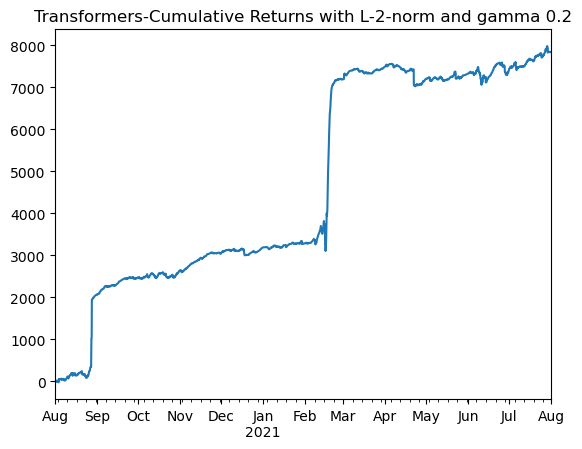

Portfolio returns 5846.564969
constraint -246.130163
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_f

100%|██████████| 10/10 [02:55<00:00, 17.55s/it]


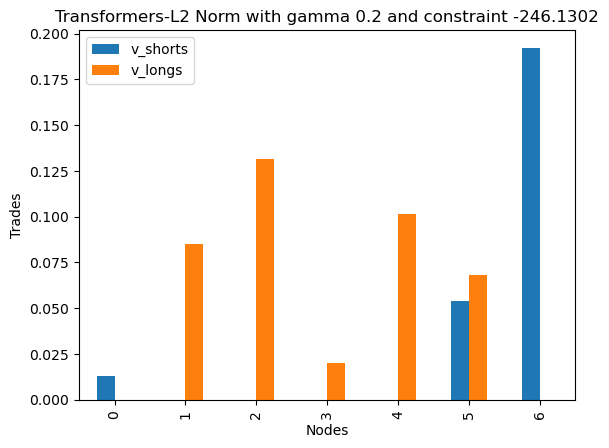

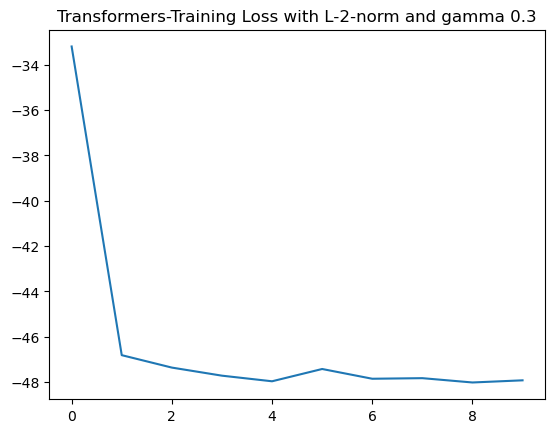

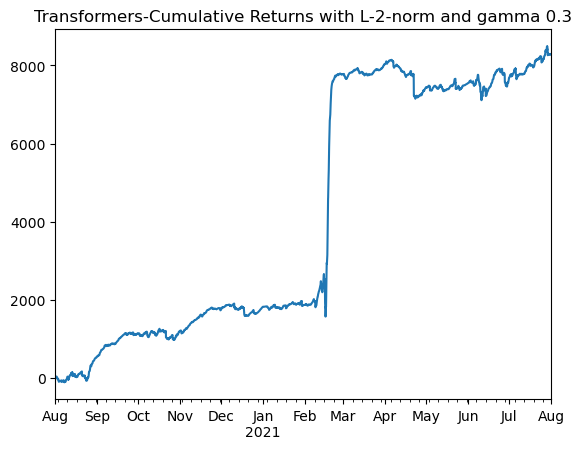

Portfolio returns 6981.095467
constraint -363.403597
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_f

100%|██████████| 10/10 [02:43<00:00, 16.35s/it]


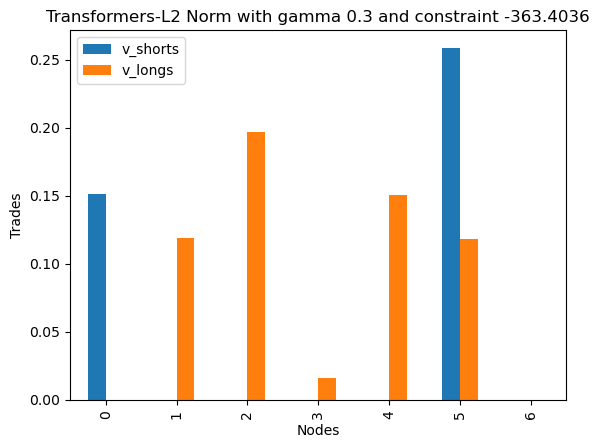

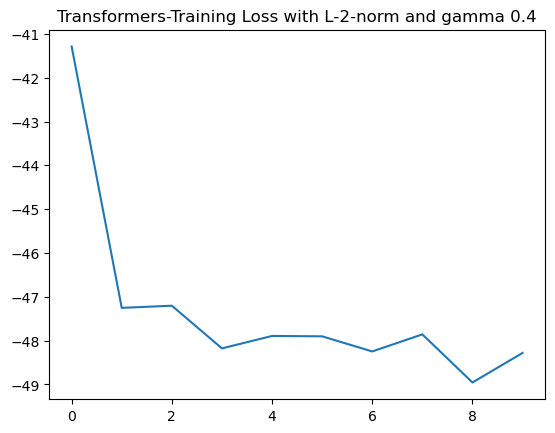

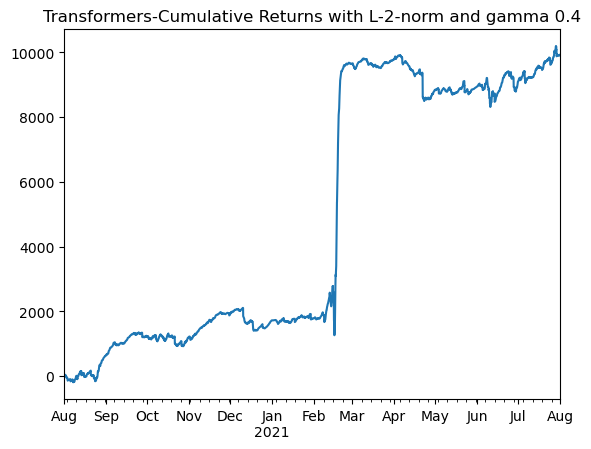

Portfolio returns 9145.945755
constraint -489.16568500000005
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=1

100%|██████████| 10/10 [01:42<00:00, 10.24s/it]


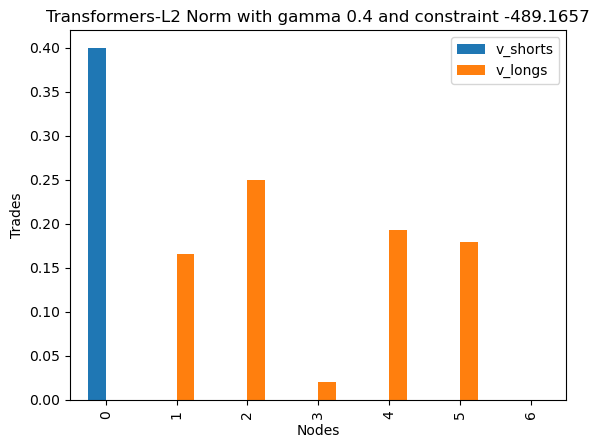

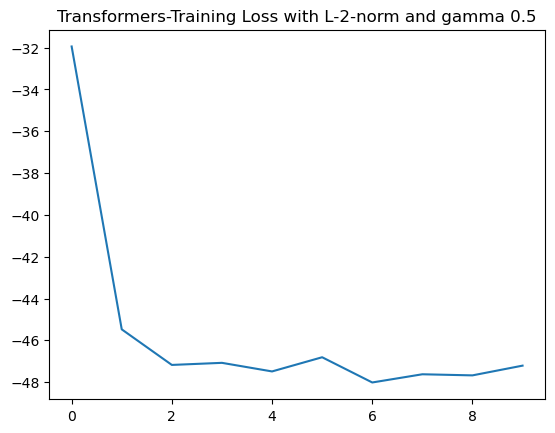

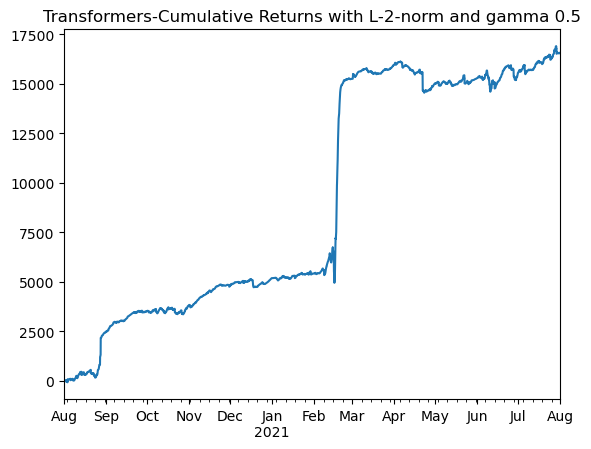

Portfolio returns 12315.974875999998
constraint -608.112202
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12

100%|██████████| 10/10 [01:53<00:00, 11.40s/it]


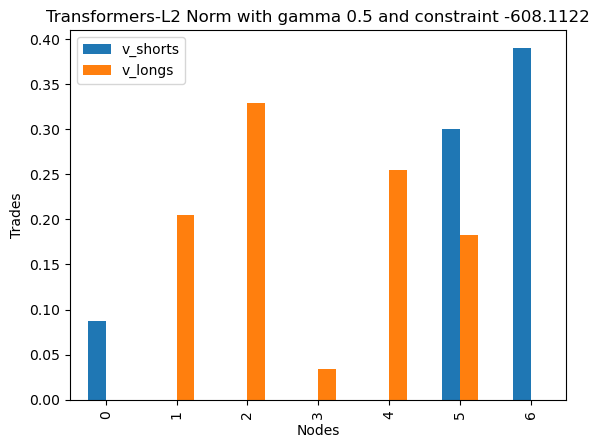

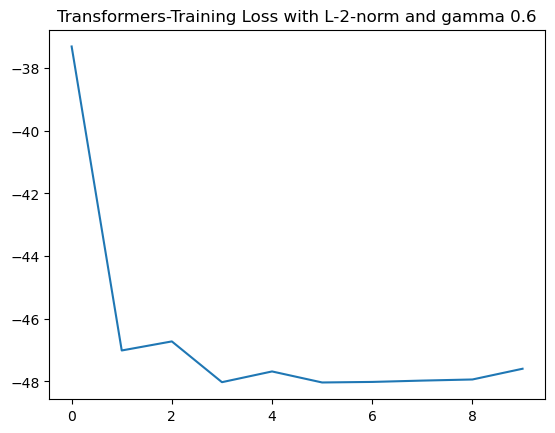

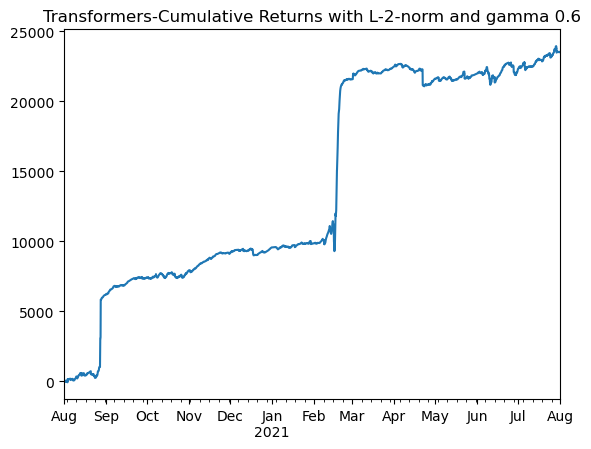

Portfolio returns 17475.806319
constraint -738.865742
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_

100%|██████████| 10/10 [01:46<00:00, 10.67s/it]


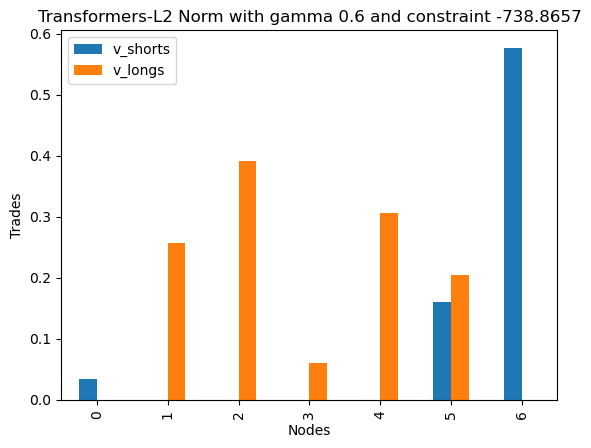

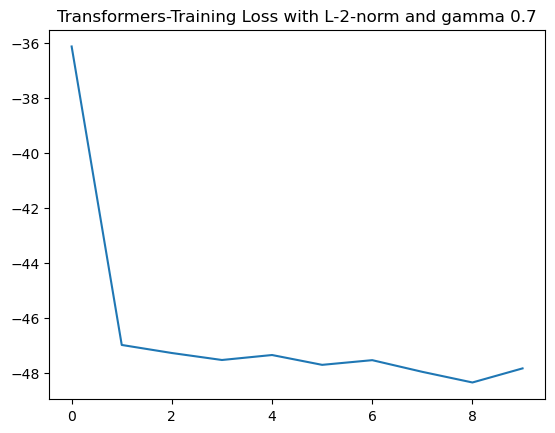

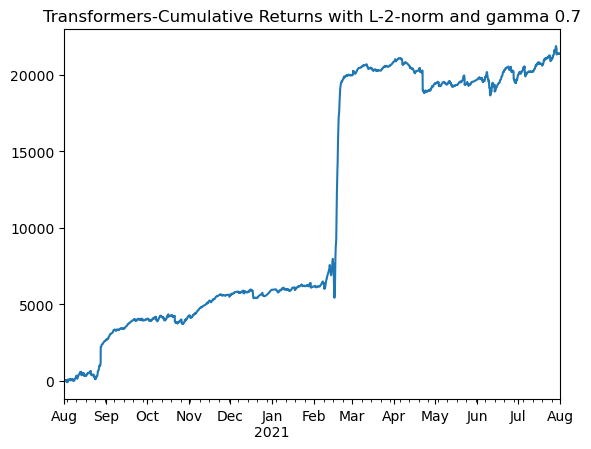

Portfolio returns 16412.673467
constraint -845.203817
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_

100%|██████████| 10/10 [01:47<00:00, 10.71s/it]


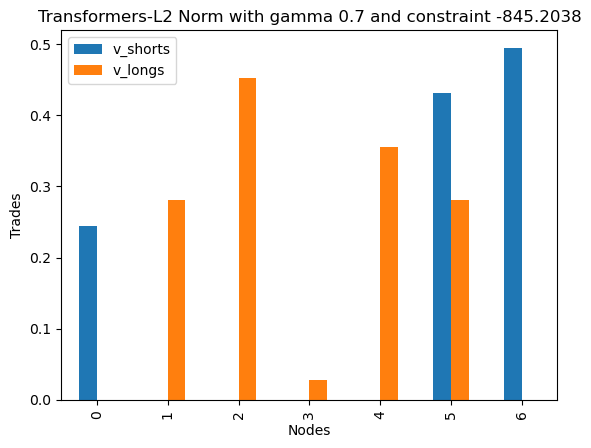

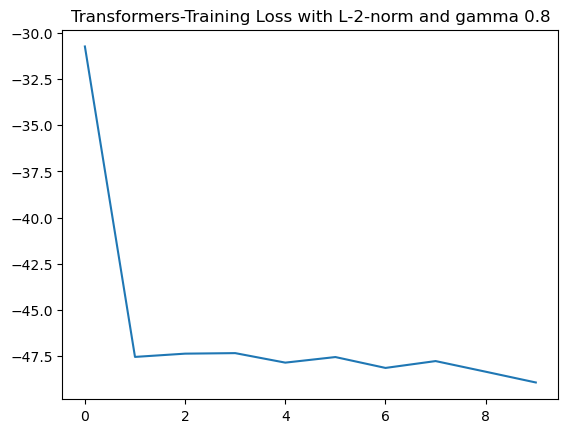

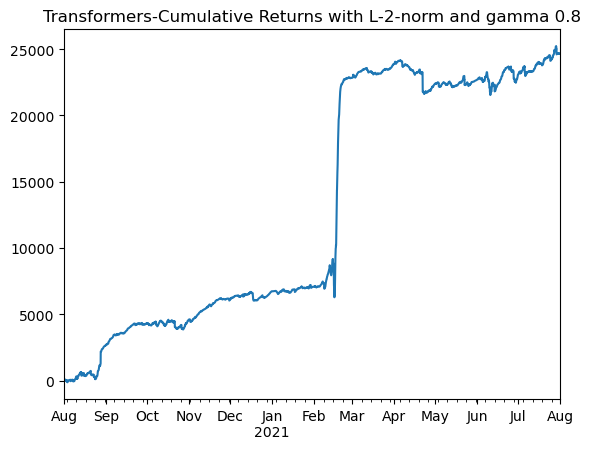

Portfolio returns 19002.141142999997
constraint -966.6224149999999


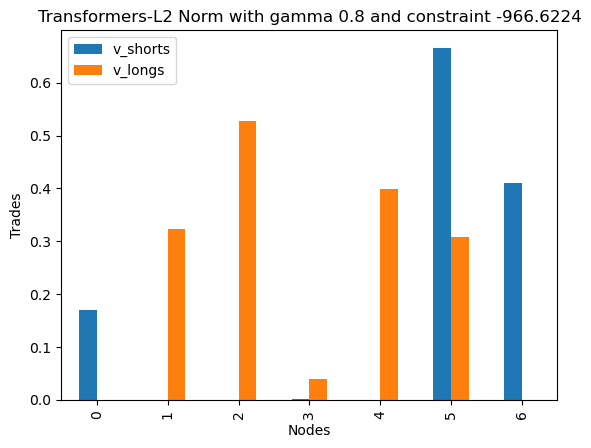

In [8]:

L_vals = np.arange(0.1,0.9,0.1)
L_norms = [1,2]
pd_dict={}
worst_loss_list = np.empty((len(L_norms), len(L_vals)))
total_return_list = []
for l_norm in L_norms:
    for k, L_val in enumerate(L_vals):
        nodes = 7
        volume_short = np.zeros((len(L_vals), nodes))
        volume_long = np.zeros((len(L_vals), nodes))
        net, model_name = Transformers_model(gamma= L_val, l_norm=l_norm)
        optimizer = torch.optim.RMSprop(net.parameters(), lr=1e-3, weight_decay=0)

        print(net)

        avg_loss = []

        NUM_EPOCHS = 10  # The model is very slow to train
        NUM_BATCHES = 35

        for epoch in tqdm(range(NUM_EPOCHS)):
            running_sum = 0
            for batch in range(NUM_BATCHES):
                running_sum += net.train_step(optimizer, 32, da_train.values.T, 24, 24)
            avg_loss.append(running_sum / NUM_BATCHES)

        plt.figure()
        plt.plot(avg_loss)
        plt.title('{}-Training Loss with L-{}-norm and gamma {}'.format(model_name,l_norm, round(L_val,4)))
        plt.show()

        v_long, bid, v_short, offer = net.predict(X_validate, da, da_validate, rt_validate)
        results = hourly_results(v_long, bid.values, v_short, offer.values, da_validate, rt_validate)
        pnl = results.sum(axis=1).cumsum()
        pnl.plot()
        plt.title('{}-Cumulative Returns with L-{}-norm and gamma {}'.format(model_name,l_norm, round(L_val,4)))
        plt.show()
        portfolio_rets = bid.dot(v_long)+ offer.dot(v_short)
        constraint = worst_loss(results)
        print('Portfolio returns',np.sum(portfolio_rets))
        print('constraint',constraint)
        portfolio_rets = bid.dot(v_long)+ offer.dot(v_short)
        for i in range(nodes):
            volume_long[k, :] = v_long
            volume_short[k, :] = v_short
            pd_dict[l_norm, k] = pd.DataFrame({"gamma": f"{round(L_vals[k],4)}",
                            "v_shorts":v_long,
                            "v_longs":v_short})
            pd_dict[l_norm,k]['L_norm'] = f"L{l_norm}"
            #cum_return = np.sum(portfolio_rets)[0]
            #print('cum_return', cum_return)
        pd_dict[l_norm,k]['model'] = model_name
        pd_dict[l_norm,k]['PTF_Return'] = np.sum(portfolio_rets)
        pd_dict[l_norm,k]['Worst_Return'] = constraint
        pd_dict[l_norm,k].loc[:, :'L_norm'].plot(kind="bar")
        plt.title("{}-L{} Norm with gamma {} and constraint {}".format(model_name,l_norm,pd_dict[l_norm,k]['gamma'][0], round(pd_dict[l_norm,k]['Worst_Return'][0],4)) )
        plt.xlabel("Nodes")
        plt.ylabel("Trades")
        #worst_loss_list[l_norm, k] = constraint
        #total_return_list[l_norm, k] = cum_return

In [10]:
pd_dict

{(1,
  0):   gamma  v_shorts  v_longs L_norm         model  PTF_Return  Worst_Return
 0   0.1    0.0078      0.0     L1  Transformers    1048.861        -61.09
 1   0.1    0.0078      0.0     L1  Transformers    1048.861        -61.09
 2   0.1    0.0078      0.0     L1  Transformers    1048.861        -61.09
 3   0.1    0.0078      0.0     L1  Transformers    1048.861        -61.09
 4   0.1    0.0078      0.0     L1  Transformers    1048.861        -61.09
 5   0.1    0.0078      0.1     L1  Transformers    1048.861        -61.09
 6   0.1    0.0078      0.0     L1  Transformers    1048.861        -61.09,
 (1,
  1):   gamma  v_shorts  v_longs L_norm         model  PTF_Return  Worst_Return
 0   0.2     0.016      0.0     L1  Transformers     2243.94      -120.828
 1   0.2     0.000      0.0     L1  Transformers     2243.94      -120.828
 2   0.2     0.016      0.2     L1  Transformers     2243.94      -120.828
 3   0.2     0.016      0.0     L1  Transformers     2243.94      -120.828
 4  